# Solución prueba Técnica 

### Librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [2]:
df=pd.read_csv('/Users/isaromobru/Desktop/DS102024_/3-MachineLearning/2-Supervisado/Ejercicios/PruebaTecnica/data/train.csv')
df

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


## Analisis EDA

clase para realizar las principales características del dataset.

In [3]:
class BasicEDA:
    def __init__(self, data):
        """
        Inicializa la clase con un DataFrame
        
        Parameters:
        -----------
        data : pandas.DataFrame
            DataFrame a analizar
        """
        self.data = data
        self.numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        self.categorical_columns = self.data.select_dtypes(include=['object', 'category']).columns
        
    def info_basica(self):
        """Muestra información básica del DataFrame"""
        print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
        print("\nDimensiones del DataFrame:", self.data.shape)
        print("\nColumnas del DataFrame:", list(self.data.columns))
        print("\nTipos de datos:")
        print(self.data.dtypes)
        print("\nValores nulos por columna:")
        print(self.data.isnull().sum())
        print("\nColumnas numéricas:", list(self.numeric_columns))
        
    def estadisticas_descriptivas(self):
        """Muestra estadísticas descriptivas de las variables numéricas"""
        if len(self.numeric_columns) == 0:
            print("No hay columnas numéricas en el DataFrame")
            return None
        print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
        return self.data[self.numeric_columns].describe()
    def detectar_outliers(self, columnas=None, umbral=1.5):
        """
        Detecta outliers usando el método IQR
        
        Parameters:
        -----------
        columnas : list, optional
            Lista de columnas a analizar. Si es None, usa todas las numéricas
        umbral : float, optional
            Multiplicador del IQR para considerar un valor como outlier
        """
        if columnas is None:
            columnas = self.numeric_columns
            
        if len(columnas) == 0:
            print("No hay columnas numéricas para detectar outliers")
            return None
            
        outliers = {}
        for columna in columnas:
            Q1 = self.data[columna].quantile(0.25)
            Q3 = self.data[columna].quantile(0.75)
            IQR = Q3 - Q1
            
            outliers_bajo = self.data[columna] < (Q1 - umbral * IQR)
            outliers_alto = self.data[columna] > (Q3 + umbral * IQR)
            
            n_outliers = (outliers_bajo | outliers_alto).sum()
            
            outliers[columna] = {
                'n_outliers': n_outliers,
                'porcentaje': (n_outliers / len(self.data)) * 100
            }
            
        return pd.DataFrame(outliers).T
    
    def test_normalidad(self, columnas=None):
        """
        Realiza test de normalidad de Shapiro-Wilk
        
        Parameters:
        -----------
        columnas : list, optional
            Lista de columnas a analizar. Si es None, usa todas las numéricas
        """
        if columnas is None:
            columnas = self.numeric_columns
            
        if len(columnas) == 0:
            print("No hay columnas numéricas para realizar el test de normalidad")
            return None
            
        resultados = {}
        for columna in columnas:
            stat, p_value = stats.shapiro(self.data[columna])
            resultados[columna] = {
                'estadístico': stat,
                'p_valor': p_value,
                'es_normal': p_value > 0.05
            }
            
        return pd.DataFrame(resultados).T
    
    def resumen_completo(self):
 
        self.info_basica()
        
        if len(self.numeric_columns) > 0:
            print("\nEstadísticas descriptivas:")
            print(self.estadisticas_descriptivas())
            self.histogramas()
            self.boxplots()
            self.matriz_correlacion()
            print("\nDetección de outliers:")
            print(self.detectar_outliers())
            print("\nTest de normalidad:")
            print(self.test_normalidad())
        else:
            print("\nNo hay columnas numéricas en el DataFrame para realizar análisis estadísticos")
    def analisis_categoricas(self):
        """Muestra análisis básico de variables categóricas"""
        if len(self.categorical_columns) == 0:
            print("No hay columnas categóricas en el DataFrame")
            return None
            
        print("\n=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")
        resultados = {}
        
        for columna in self.categorical_columns:
            value_counts = self.data[columna].value_counts()
            unique_count = len(value_counts)
            
            resultados[columna] = {
                'categorías_únicas': unique_count,
                'categoría_más_frecuente': value_counts.index[0],
                'frecuencia_más_alta': value_counts.iloc[0],
                'categoría_menos_frecuente': value_counts.index[-1],
                'frecuencia_más_baja': value_counts.iloc[-1],
                'ratio_valores_únicos': unique_count / len(self.data)
            }
            
        return pd.DataFrame(resultados).T

    def graficos_categoricas(self, max_categories=10, figsize=(12, 6)):
        """
        Genera gráficos de barras y pie charts para variables categóricas
        
        Parameters:
        -----------
        max_categories : int, optional
            Número máximo de categorías a mostrar (las demás se agrupan como 'Otros')
        figsize : tuple, optional
            Tamaño de la figura
        """
        if len(self.categorical_columns) == 0:
            print("No hay columnas categóricas para visualizar")
            return
            
        for columna in self.categorical_columns:
            value_counts = self.data[columna].value_counts()
            
            # Si hay demasiadas categorías, agrupar las menos frecuentes
            if len(value_counts) > max_categories:
                otros = pd.Series({
                    'Otros': value_counts[max_categories:].sum()
                })
                value_counts = pd.concat([value_counts[:max_categories], otros])
            
            # Crear subplots para gráfico de barras y pie chart
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
            
            # Gráfico de barras
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
            ax1.set_title(f'Distribución de {columna}')
            ax1.tick_params(axis='x', rotation=45)
            
            # Pie chart
            ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            ax2.set_title(f'Proporción de {columna}')
            
            plt.tight_layout()
            plt.show()

    def tabla_contingencia(self, col1=None, col2=None):
        """
        Genera tablas de contingencia entre variables categóricas
        
        Parameters:
        -----------
        col1, col2 : str, optional
            Nombres de las columnas a cruzar. Si no se especifican,
            se generan todas las combinaciones posibles
        """
        if len(self.categorical_columns) < 2:
            print("Se necesitan al menos dos columnas categóricas para crear tablas de contingencia")
            return
            
        if col1 and col2:
            if col1 not in self.categorical_columns or col2 not in self.categorical_columns:
                print("Las columnas especificadas deben ser categóricas")
                return
            
            tabla = pd.crosstab(self.data[col1], self.data[col2])
            chi2, p_value = stats.chi2_contingency(tabla)[:2]
            
            print(f"\nTabla de contingencia entre {col1} y {col2}:")
            print(tabla)
            print(f"\nTest Chi-cuadrado:")
            print(f"Estadístico: {chi2:.4f}")
            print(f"P-valor: {p_value:.4f}")
            
        else:
            for i, col1 in enumerate(self.categorical_columns[:-1]):
                for col2 in self.categorical_columns[i+1:]:
                    tabla = pd.crosstab(self.data[col1], self.data[col2])
                    chi2, p_value = stats.chi2_contingency(tabla)[:2]
                    
                    print(f"\nTabla de contingencia entre {col1} y {col2}:")
                    print(tabla)
                    print(f"\nTest Chi-cuadrado:")
                    print(f"Estadístico: {chi2:.4f}")
                    print(f"P-valor: {p_value:.4f}")
                    print("\n" + "="*50)

    def resumen_completo(self):
        """Ejecuta todos los análisis básicos"""
        self.info_basica()
        
        if len(self.numeric_columns) > 0:
            print("\nEstadísticas descriptivas:")
            print(self.estadisticas_descriptivas())
            print("\nDetección de outliers:")
            print(self.detectar_outliers())
            print("\nTest de normalidad:")
            print(self.test_normalidad())
        else:
            print("\nNo hay columnas numéricas en el DataFrame para realizar análisis estadísticos")
            
        if len(self.categorical_columns) > 0:
            print("\nAnálisis de variables categóricas:")
            print(self.analisis_categoricas())
            self.graficos_categoricas()
            if len(self.categorical_columns) >= 2:
                print("\nTablas de contingencia:")
                self.tabla_contingencia()
        else:
            print("\nNo hay columnas categóricas en el DataFrame para realizar análisis")
# Ejemplo de uso
#if __name__ == "__main__":
    # Crear datos de ejemplo
    #data = pd.DataFrame({
    #    'edad': np.random.normal(25, 5, 100),
    #    'altura': np.random.normal(170, 10, 100),
     #   'peso': np.random.normal(70, 12, 100)
   # })
    
    # Crear instancia de BasicEDA
   # eda = BasicEDA(data)
    
    # Ejecutar análisis completo
  #  eda.resumen_completo()

In [4]:
eda= BasicEDA(df)
eda.resumen_completo()


=== INFORMACIÓN BÁSICA DEL DATASET ===

Dimensiones del DataFrame: (5597, 22)

Columnas del DataFrame: ['ID', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'target']

Tipos de datos:
ID          int64
col1      float64
col2      float64
col3      float64
col4      float64
col5      float64
col6      float64
col7      float64
col8      float64
col9      float64
col10     float64
col11     float64
col12     float64
col13     float64
col14     float64
col15     float64
col16     float64
col17     float64
col18     float64
col19     float64
col20     float64
target      int64
dtype: object

Valores nulos por columna:
ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
t

/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5597.
  res = hypotest_fun_out(*samples, **kwds)


- las columnas son todas numericas y están en tipo float por lo que no hay que realizar ningun cambio.
- No se encuentra Outliers 
- Por lo general el minimo de todos es 0 menos algunos que se puede encontrar un valor negativo, el maximo de las diferentes variables cambian bastante, por lo general las variables tienen rangos de numericos bastante dispares, por lo que es dificil sacar patrones.
- La prueba de normalidad muestra que ninguna de las columnas sigue una distribución normal. 
- Las columnas 1, 3,14 contienen outliers, ademas de la target.

## visualizaciones

### Analisis Univariante

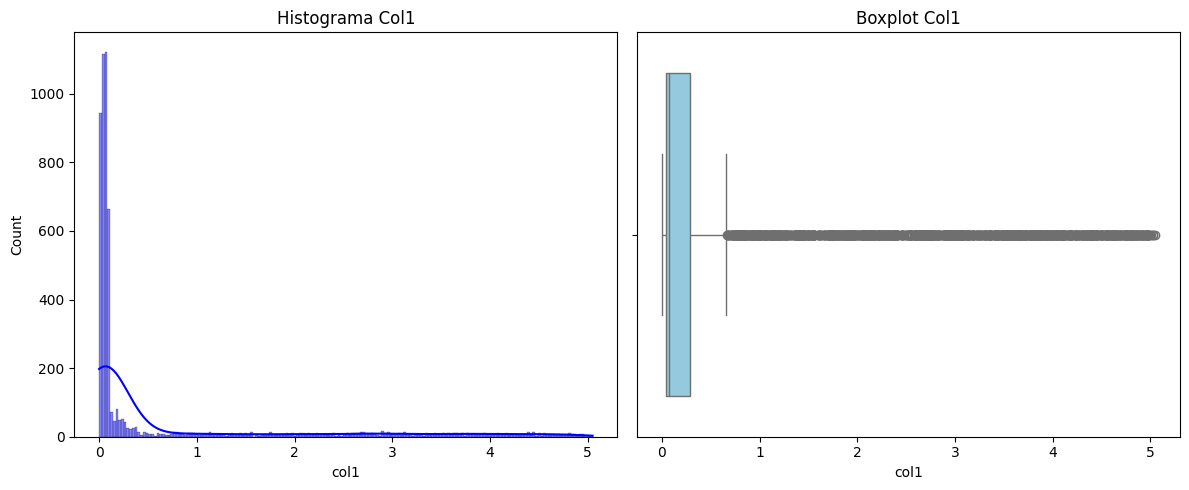

In [5]:

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma en el primer subplot
sns.histplot(data=df['col1'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histograma Col1')

# Boxplot en el segundo subplot
sns.boxplot(x=df['col1'], color='skyblue', ax=ax2)
ax2.set_title('Boxplot Col1')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar la figura
plt.show()     

Podemos observar que la columna 1 muy sesgada a la derecha y podemos observar mediante el boxplot la gran cantidad de outliers.

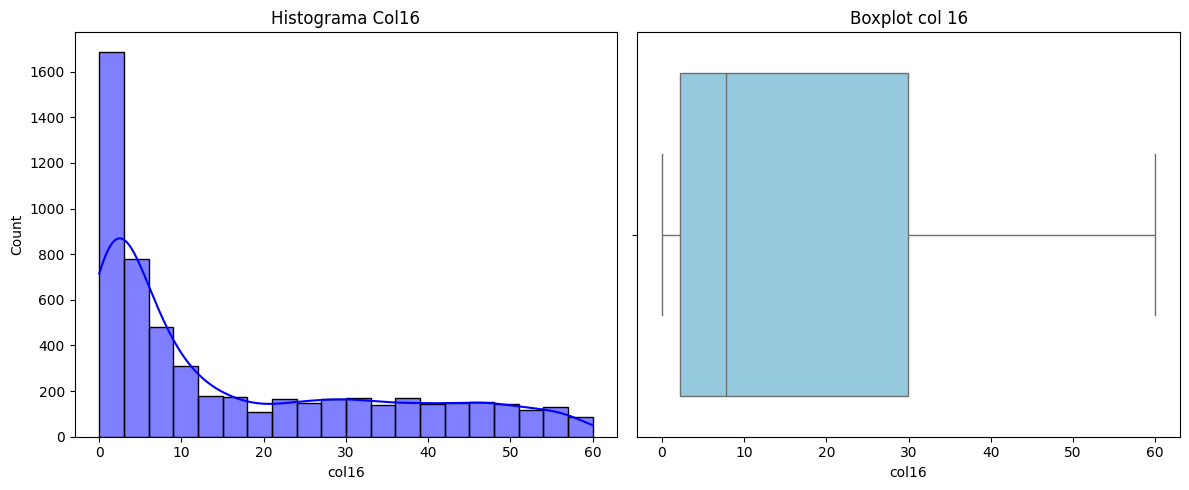

In [6]:

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma en el primer subplot
sns.histplot(data=df['col16'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histograma Col16')

# Boxplot en el segundo subplot
sns.boxplot(x=df['col16'], color='skyblue', ax=ax2)
ax2.set_title('Boxplot col 16')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar la figura
plt.show()     

Se puede observar que tiene una distribución muy sesgada a la derecha, mediante el boxplot se puede observar que hay una gran diferencia entre la mediana y el percentil 75%, por otro lado, no coniente Outliers

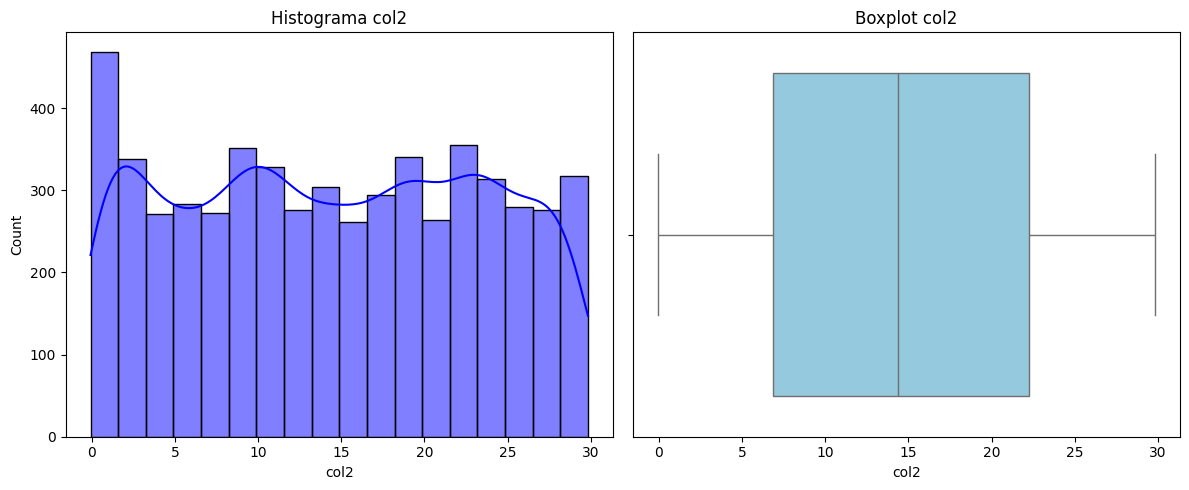

In [7]:

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma en el primer subplot
sns.histplot(data=df['col2'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histograma col2')

# Boxplot en el segundo subplot
sns.boxplot(x=df['col2'], color='skyblue', ax=ax2)
ax2.set_title('Boxplot col2')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar la figura
plt.show()     

La distribución no es normal y se podría decir que es multimodal.

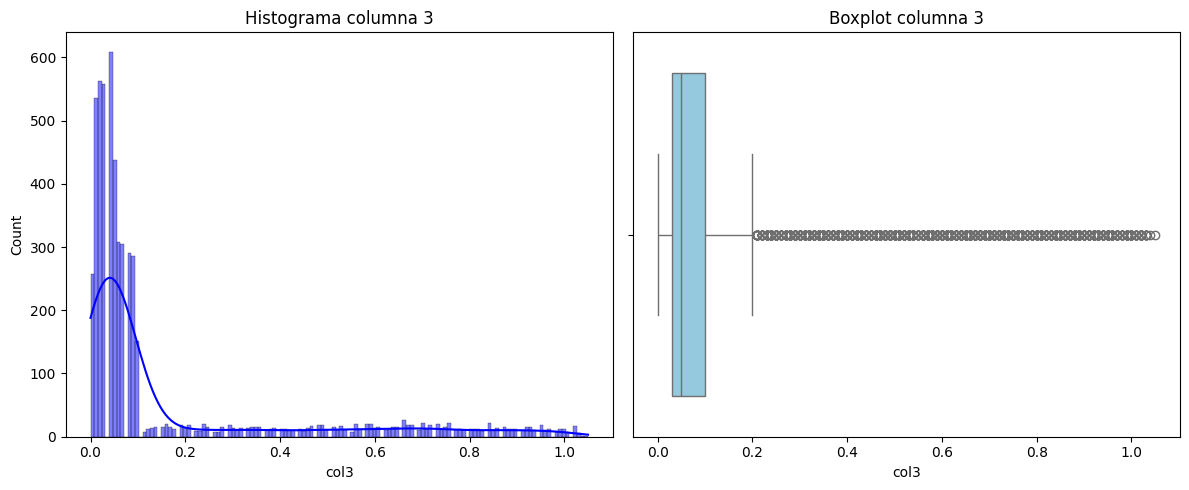

In [8]:

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma en el primer subplot
sns.histplot(data=df['col3'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histograma columna 3')

# Boxplot en el segundo subplot
sns.boxplot(x=df['col3'], color='skyblue', ax=ax2)
ax2.set_title('Boxplot columna 3')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar la figura
plt.show()     

Podemos observar que la columna 3 muy sesgada a la derecha y podemos observar mediante el boxplot la gran cantidad de outliers.

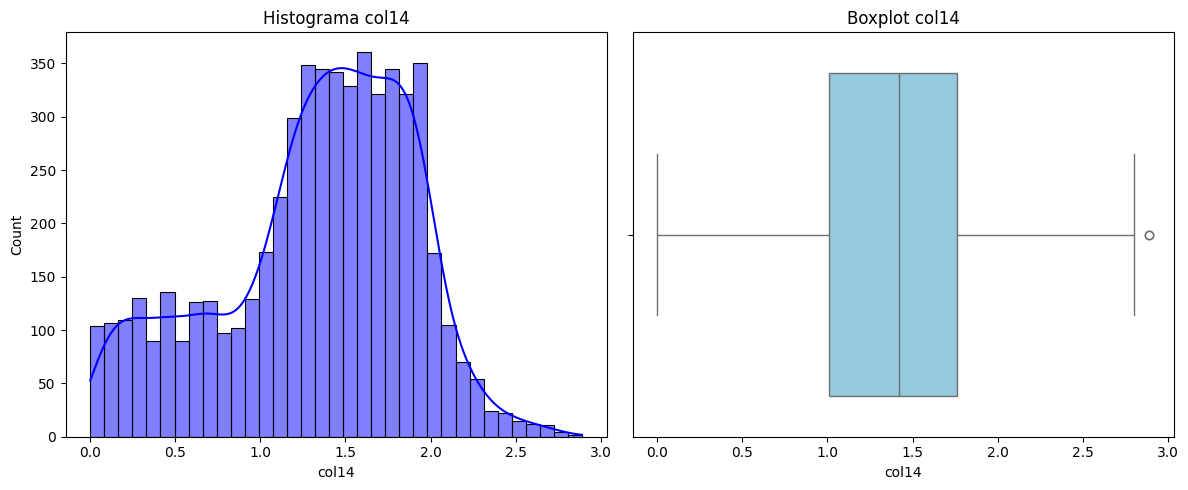

In [9]:

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma en el primer subplot
sns.histplot(data=df['col14'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histograma col14')

# Boxplot en el segundo subplot
sns.boxplot(x=df['col14'], color='skyblue', ax=ax2)
ax2.set_title('Boxplot col14')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar la figura
plt.show()     

La distribución de la columna 14 podría tener una distribución normal debido a la concentración de datos en el centro, sin embargo, podemos observar que es practicamente bimodal y hay una gran cantidad de datos a la izquierda en comparaciín con la derecha. En el boxplot tiene unas dimensiones bastante proporcionadas, por otro lado, podemos observar Outliers.

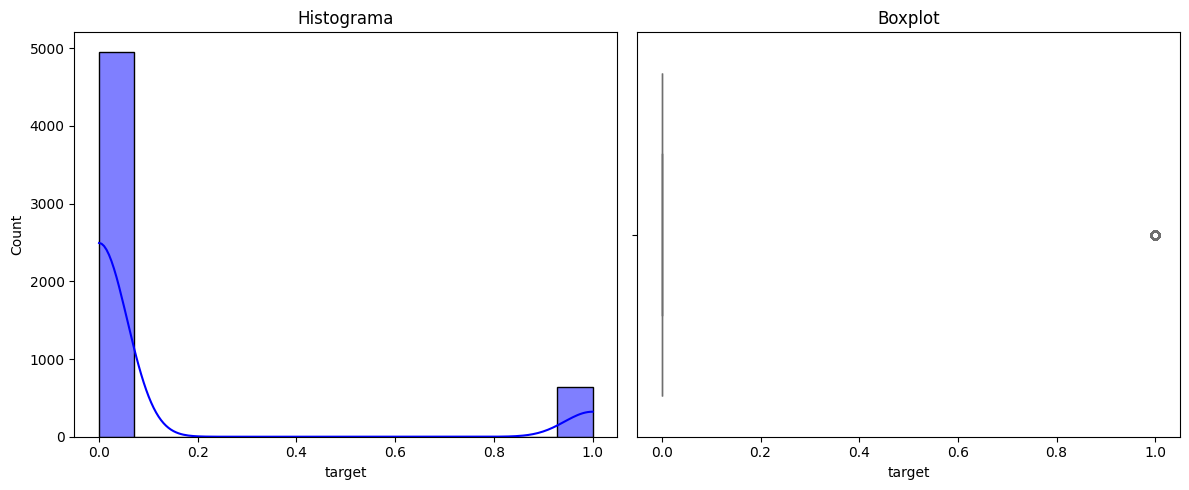

In [10]:

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma en el primer subplot
sns.histplot(data=df['target'], kde=True, color='blue', ax=ax1)
ax1.set_title('Histograma')

# Boxplot en el segundo subplot
sns.boxplot(x=df['target'], color='skyblue', ax=ax2)
ax2.set_title('Boxplot')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar la figura
plt.show()     

In [11]:
true= df['target']==1
print(true.sum())
false=df['target']==0
print(false.sum())

640
4957


Se puede observar que la target esta muy poco balanceada ya que hay muchos más 0(False) que True(1).

## Mapa de correlación

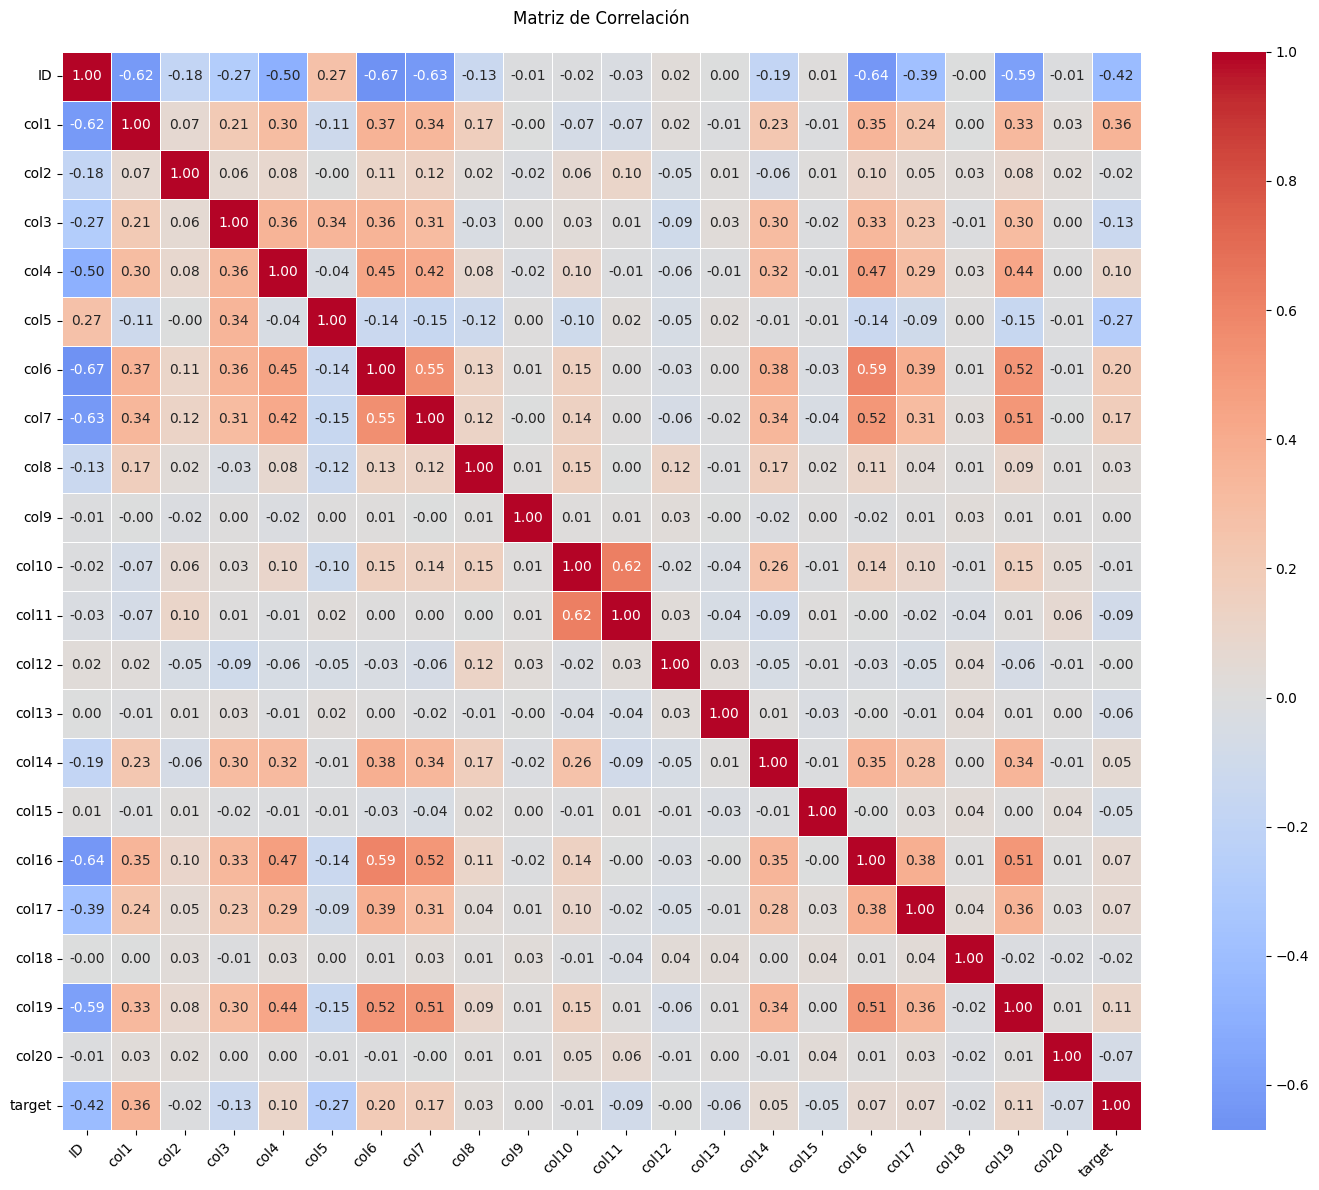

In [12]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear la figura con un tamaño adecuado
plt.figure(figsize=(15, 12))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, 
            annot=True,           # Muestra los valores
            cmap='coolwarm',      # Esquema de colores (rojo-azul)
            center=0,             # Centra el colormap en 0
            fmt='.2f',            # Formato de números con 2 decimales
            square=True,          # Hace las celdas cuadradas
            linewidths=0.5)       # Añade líneas entre celdas

# Ajustar el título
plt.title('Matriz de Correlación', pad=20)

# Rotar las etiquetas para mejor visibilidad
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [13]:
true= df['target']==1
print(true.sum())
false=df['target']==0
print(false.sum())

640
4957


se puede ver que esta muy desvalanceado ya que hay muchos mas False que TrUe

In [14]:
df.copy()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


## Preprocesamiento de datos 

Voy hacer una prueba quedandome solo con los datos que muestran una mayor correlación con la target.

In [15]:
df1=df[['col1','col3','col4','col5','col6','col7','col8','col9','col19','target']] #df con datos con mayor correlación
pd.DataFrame(df1)

,col1,col3,col4,col5,col6,col7,col8,col9,col19,target
0,0.02,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.08,0
1,1.13,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.45,0
2,0.07,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.03,0
3,0.09,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.01,0
4,0.94,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.19,1
...,...,...,...,...,...,...,...,...,...,...
5592,0.01,0.20,4.88,0.050,0.36,0.09,0.54,0.14,0.43,0
5593,0.09,0.04,3.45,0.003,3.42,0.03,1.39,1.12,0.11,0
5594,0.10,0.01,0.25,0.040,0.09,0.10,1.88,0.33,0.10,0
5595,0.05,0.04,3.65,0.001,4.43,0.63,1.94,1.27,0.22,0


In [16]:
# 1. Separar la target del resto de variables
X = df1.drop(columns='target')
y = df1['target']

# 2. Escalar solo las variables independientes
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Convertir a DataFrame y añadir nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 4. Volver a unir con la target
dffiltrado1 = pd.concat([X_scaled_df, y], axis=1)

In [17]:
# División en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (4477, 9)
Shape de X_test: (1120, 9)
Shape de y_train: (4477,)
Shape de y_test: (1120,)


## Regresión logística

In [18]:
# Crear el modelo con class_weight='balanced'
rlog = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000) #class_weight='balanced' ya que no esta balanceado la target 

# Entrenar el modelo
rlog.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [19]:
#prediccion
y_pred = rlog.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8232


In [21]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[828, 164],
       [ 34,  94]])

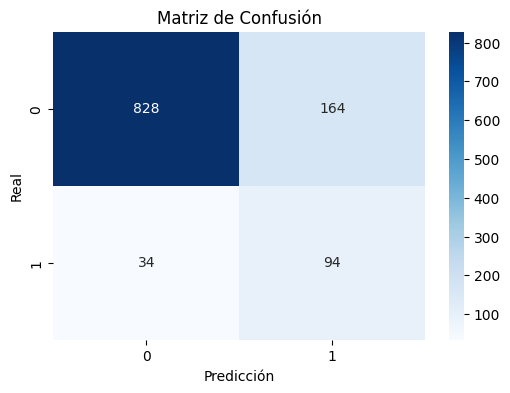

In [22]:
# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

La regresión Logística presenta un accuracy alto, un 0,82 por lo que se podría decir que predice bastante bien este modelo, sin embargo, al ver la matriz de confusión podemos ver que donde más se equivoca es al predecir los 1, ya que predice mal 164, por otro lado, en los 0 solo se equivoca en 34. Viendo las proporciones del dataset son valores bastante bajos, pero es mejor probar más modelos para obtener más resultados óptimos

## Arbol de decisión 

In [23]:
tree_cfl = DecisionTreeClassifier(max_depth=2,random_state=42,class_weight='balanced')
tree_cfl.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [24]:
# Hacer predicciones
y_pred = tree_cfl.predict(X_test)

In [25]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.92


El accuracy es muy alto, un 0,92. Por lo que podemos decir que es un buen modelo, sin embargo, al tener la target tan desbalanceada es importante hacer otras pruebas adicionales y ver más opciones menos sensibles para obtener resultados más óptimos. 

## Random Forest

In [26]:
# Crear y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced_subsample')
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred1 = rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred1)
print(f'Precisión del Random Forest: {accuracy:.4f}')

Precisión del Random Forest: 0.9268


El random forest muestra el accuracy mas alto, 0,93, es decir, se equivoca tan solo en un 0,067, aproximadamente se equivocaría en 67 casos.

## Prueba AUC-ROC Score

In [27]:
# 3. Obtener probabilidades de predicción
y_pred_proba_log = rlog.predict_proba(X_test)[:, 1]
y_pred_proba_tree = tree_cfl.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# 4. Calcular AUC-ROC
auc_log = roc_auc_score(y_test, y_pred_proba_log)
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"AUC-ROC Regresión Logística: {auc_log:.4f}")
print(f"AUC-ROC Árbol de Decisión: {auc_tree:.4f}")
print(f"AUC-ROC Random Forest: {auc_rf:.4f}")


AUC-ROC Regresión Logística: 0.8694
AUC-ROC Árbol de Decisión: 0.8913
AUC-ROC Random Forest: 0.9414


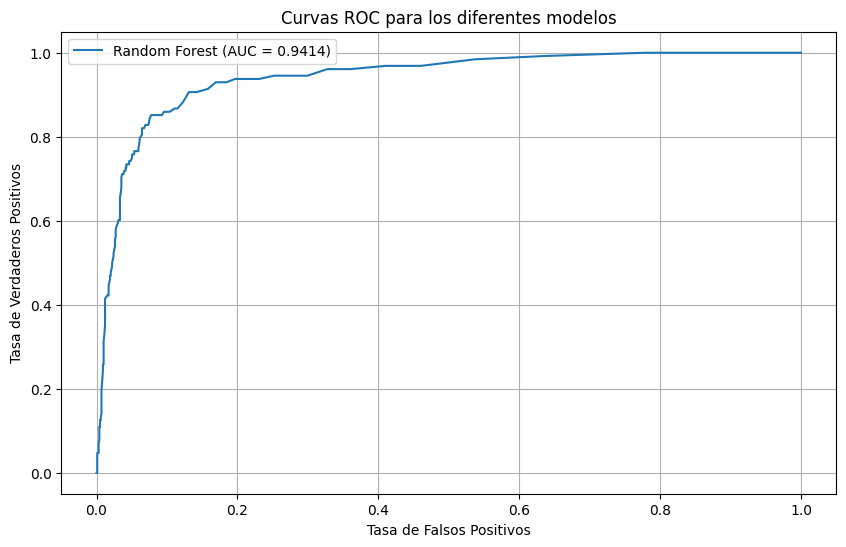

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
# 5. Visualizar las curvas ROC
plt.figure(figsize=(10, 6))
# Curva ROC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para los diferentes modelos')
plt.legend()
plt.grid(True)
plt.show()



La curva AUC-ROC (Área Bajo la Curva - Receiver Operating Characteristic) es una métrica para evaluar modelos de clasificación, especialmente cuando hay desbalance de clases, como es en nuestro caso, ya que hay muchos 0 en comparación a 1. Ademas es muy recomendable su uso en clasificaciones binarias como es en este caso.
Los tres modelos muestran una buena capacidad predictiva ya que estan por encima de 0,8. El que mejores resultados muestra es el Random Forest con un 0,94 y la curva se encuentra inclinada por la izquierda por lo que predice más verdaderos positvos que falsos positivos



## Predicciones

In [30]:
df_test= pd.read_csv("/Users/isaromobru/Desktop/DS102024_/3-MachineLearning/2-Supervisado/Ejercicios/PruebaTecnica/data/test.csv")

In [31]:
#Aplicar cambios a df_test
X_testpred=df_test[['col1','col3','col4','col5','col6','col7','col8','col9','col19']]
pd.DataFrame(X_testpred)

,col1,col3,col4,col5,col6,col7,col8,col9,col19
0,0.06,0.04,0.04,0.001,5.10,0.86,1.23,0.52,0.43
1,0.09,0.63,2.05,0.110,6.81,0.83,0.09,1.21,0.12
2,0.09,0.07,0.73,0.050,0.10,0.01,1.44,1.42,0.05
3,0.07,0.04,1.22,0.030,0.16,0.03,1.18,0.88,0.03
4,0.01,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2394,0.06,0.02,0.46,0.090,0.20,0.08,0.70,0.57,0.07
2395,2.99,0.64,2.71,0.010,2.36,0.57,1.81,0.38,0.24
2396,0.08,0.09,2.97,0.010,0.65,0.05,0.04,1.38,0.05
2397,0.08,0.01,0.22,0.001,4.50,0.66,0.01,0.56,0.04


In [32]:
# Escalar variables numéricas
scaler = MinMaxScaler()
x_test= scaler.fit_transform(X_testpred)

In [33]:
# Calculo de predicciones 
predicciones = rf.predict(X_test)
print(predicciones)

[0 1 0 ... 0 0 0]
